In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterSciNotation
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
path = r'..\data\20221111_MC_solutions_TTS.xlsx'

df_all = pd.read_excel(path, sheet_name='viscosity')
df_shift = pd.read_excel(path, sheet_name='shift_factors')

df_shift

Sample  shift_factor  Temperature [°C]  err_shift_factor
0   0.49% MC-PBS      1.190377                22      4.110043e-02
1   0.49% MC-PBS      1.000000                25      1.197399e-09
2   0.49% MC-PBS      0.918456                28      3.741560e-03
3   0.49% MC-PBS      0.855421                31      1.558492e-03
4   0.49% MC-PBS      0.825841                34      1.453814e-03
5   0.49% MC-PBS      0.699955                37      3.609338e-03
6   0.59% MC-PBS      1.045987                22      2.289511e-03
7   0.59% MC-PBS      1.000000                25      1.085273e-09
8   0.59% MC-PBS      0.885055                28      2.370605e-03
9   0.59% MC-PBS      0.868659                31      2.565836e-03
10  0.59% MC-PBS      0.817848                34      3.605421e-03
11  0.59% MC-PBS      0.746173                37      4.352950e-03
12  0.83% MC-PBS      1.261398                22      3.146000e-03
13  0.83% MC-PBS      1.000000                25      9.591511e-10
14  0.83% MC-PBS      0.887743                28      1.467065e-03
15  0.83% MC-PBS      0.791349                31      3.018126e-03
16  0.83% MC-PBS      0.743956                34      2.503133e-03
17  0.83% MC-PBS      0.720390                37      4.659345e-03

## Fig. 4A Time-temperature superposition plot for MC-PBS solutions

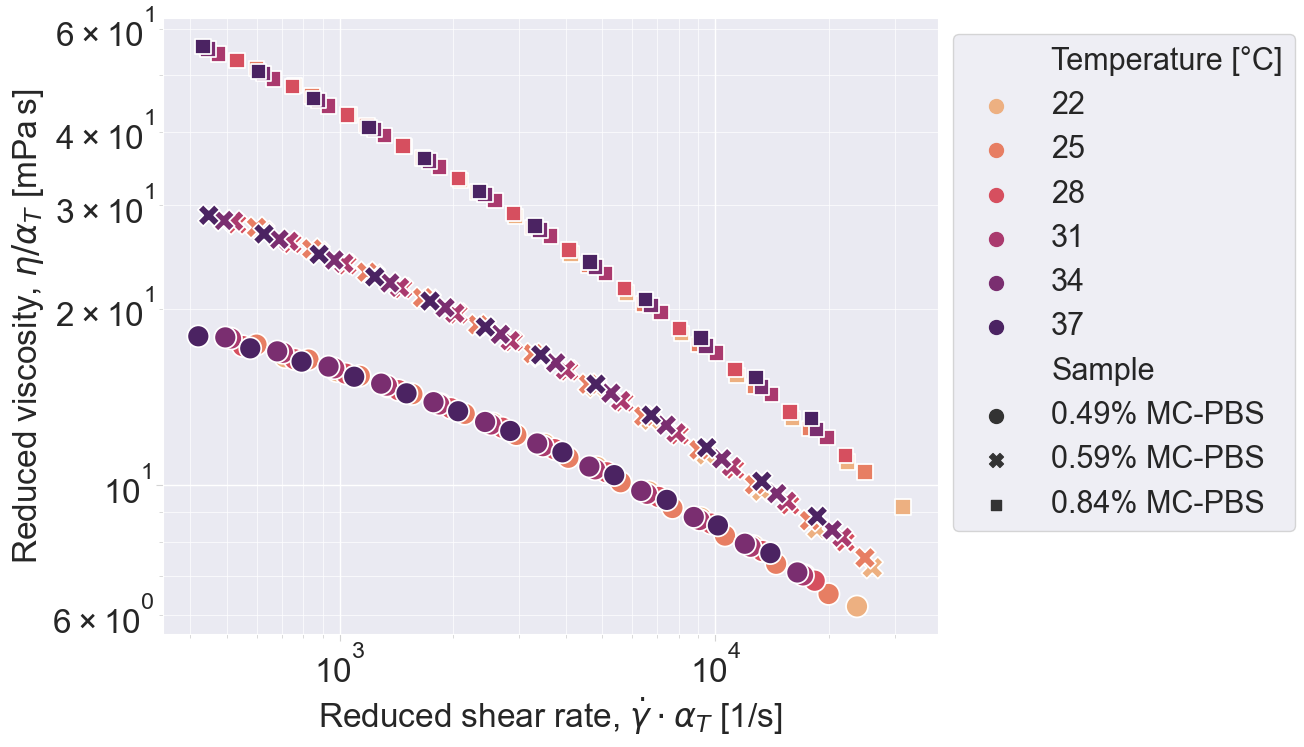

In [3]:
x_axis = 'reduced_shear_rate'
y_axis = 'reduced_viscosity'
fontsize = 24

fig = plt.figure(0, (10,8))

ax1 = plt.subplot(111)


vis = sns.scatterplot(x=x_axis, y=y_axis, data=df_all,
                      hue='Temperature [°C]',
                      style ='Sample',
                      palette='flare',
                      s=250, ax=ax1
                      )
vis.set(xscale='log', yscale='log')

ax1.legend(bbox_to_anchor=[1,1])

ax1.tick_params(reset=True, axis='both', which='major',  length=5,
               top=False, right=False, color='lightgray', labelsize=fontsize)
ax1.tick_params(reset=True, axis='both', which='minor',  length=3,
               top=False, right=False, color='lightgray', labelsize=fontsize )

y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(2,0))
x_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(2,0))

ax1.xaxis.set_minor_formatter(x_minor_formatter)
ax1.yaxis.set_minor_formatter(y_minor_formatter)


ax1.grid(visible=True, which='minor', axis='both', linewidth=0.5)
ax1.grid(visible=True, which='major', axis='both', linewidth=1)
ax1.set_xlabel("Reduced shear rate, $\dot\gamma\cdot\u03B1_{T}$ [1/s]", fontsize=fontsize)
ax1.set_ylabel("Reduced viscosity, $\eta/\u03B1_{T}$ [mPa$\,$s]", fontsize=fontsize)

lgnd = plt.legend(bbox_to_anchor=[1,1], fontsize= fontsize-2)
for handle in lgnd.legendHandles:
    handle.set_sizes([100.0])

plt.show()

#savename = r"..\plots\figure_4\Figure_4A"
#fig.savefig(savename+".png", dpi=900, bbox_inches="tight")
#fig.savefig(savename+".pdf", dpi=900, bbox_inches="tight")

## Fig. 4B Shift factors vs. temperature

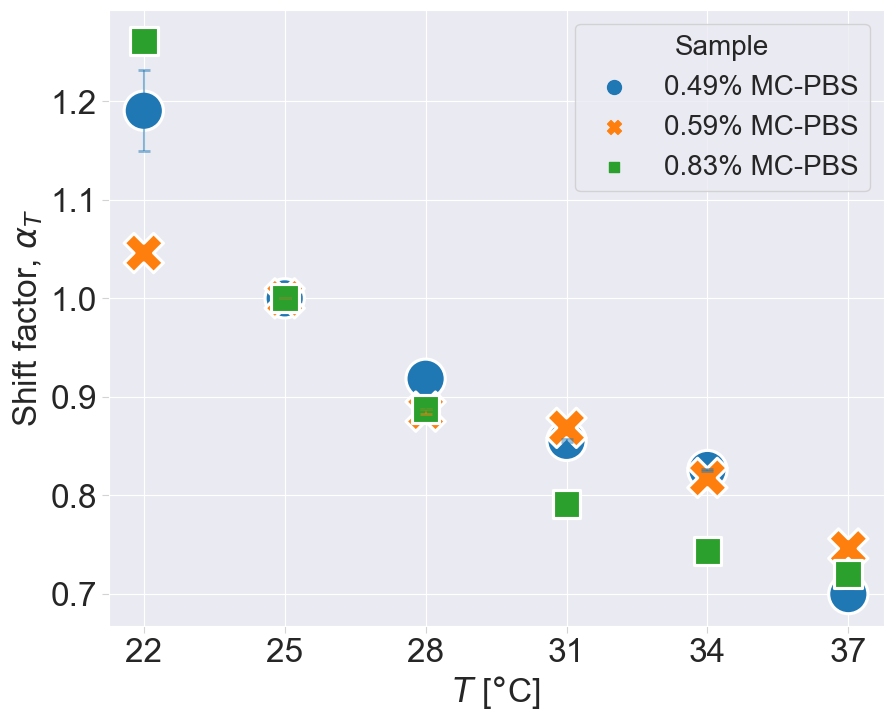

In [4]:
buffers = df_shift['Sample'].unique()
colors = sns.color_palette('tab10',6)
x_axis = 'Temperature [°C]'
y_axis = 'shift_factor'
fontsize = 24

fig2 = plt.figure(0, (10,8))
ax2 = plt.subplot(111)

shift_factors = sns.scatterplot(x=x_axis, y=y_axis, data=df_shift, hue='Sample',
                             style ='Sample', palette='tab10', s=800, ax=ax2
                             )
ax2.set_ylabel('Shift factor, $\u03B1_{T}$ ', fontsize=fontsize)
ax2.set_xlabel(r"$T$ [$\degree$C]", fontsize=fontsize)
ax2.grid(visible=True, which='minor', axis='both', linewidth=0.5)
ax2.grid(visible=True, which='major', axis='both', linewidth=1)
ax2.tick_params(reset=True, axis='both', which='major',  length=5,
                top=False, right=False, color='lightgray', labelsize=fontsize)
ax2.tick_params(reset=True, axis='both', which='minor',  length=3,
                top=False, right=False, color='lightgray', labelsize=fontsize)
ax2.set_xticks([22, 25, 28, 31, 34, 37])
ax2.set_xticklabels(['22', '25', '28', '31', '34', '37'], fontsize=fontsize)
lgnd = ax2.legend(bbox_to_anchor=[1,1], fontsize=fontsize-4, title='Sample', title_fontsize=fontsize-4)

for cc, bb in enumerate(buffers):
    df_err = df_shift[df_shift['Sample']==bb]
    x_data = df_err['Temperature [°C]']
    y_data = df_err['shift_factor']
    err_y = df_err['err_shift_factor']


    ax2.errorbar(x_data, y_data, yerr=err_y,
                xerr=None, ls='None', capsize=4, capthick=2, c=colors[cc], alpha=0.5)

for handle in lgnd.legendHandles:
    for handle in lgnd.legendHandles:
        handle.set_sizes([100.0])

plt.show()

#savename = r"..\plots\figure_4\Figure_4B"
#fig2.savefig(savename+".png", dpi=900, bbox_inches="tight")
#fig2.savefig(savename+".pdf", dpi=900, bbox_inches="tight")

## Fig. 4C First normal stress differences - temperature curve with power law fitting (> 5000 1/s)

In [5]:
path2 = r'..\data\20211210_temperature_study_all_buffers.xlsx'

df_05 = pd.read_excel(path2, sheet_name='0.49% MC-PBS', header=0)
df_06 =  pd.read_excel(path2, sheet_name='0.59% MC-PBS', header=0)
df_084 = pd.read_excel(path2, sheet_name='0.83% MC-PBS', header=0)
df_06

Point No        Sample  Shear rate  Shear stress  Viscosity  \
0           1  0.59% MC-PBS         600        17.197    28.6660   
1           2  0.59% MC-PBS         842        22.292    26.4740   
2           3  0.59% MC-PBS        1180        28.627    24.2220   
3           4  0.59% MC-PBS        1660        36.459    21.9780   
4           5  0.59% MC-PBS        2330        45.930    19.7260   
..        ...           ...         ...           ...        ...   
271         8  0.59% MC-PBS        6440        67.454    10.4760   
272         9  0.59% MC-PBS        9040        84.494     9.3486   
273        10  0.59% MC-PBS       12700       104.930     8.2705   
274        11  0.59% MC-PBS       17800       130.230     7.3129   
275        12  0.59% MC-PBS       25000       161.520     6.4614   

     Temperature [°C]  Repeat  Normal Force  Rotational Speed     R   rho  \
0                  22       1          0.01          0.511860  0.02  1005   
1                  22       1          0.02          0.718460  0.02  1005   
2                  22       1          0.02          1.008400  0.02  1005   
3                  22       1          0.03          1.415400  0.02  1005   
4                  22       1          0.05          1.986800  0.02  1005   
..                ...     ...           ...               ...   ...   ...   
271                37       5          0.08          5.494167  0.02  1005   
272                37       5          0.10          7.711833  0.02  1005   
273                37       5          0.11         10.825333  0.02  1005   
274                37       5          0.13         15.195500  0.02  1005   
275                37       5          0.13         21.330000  0.02  1005   

             N1  concentration  
0     16.071421            0.6  
1     32.138189            0.6  
2     32.436166            0.6  
3     48.938755            0.6  
4     81.926701            0.6  
..          ...            ...  
271  145.288685            0.6  
272  194.549162            0.6  
273  244.813275            0.6  
274  344.320509            0.6  
275  477.670318            0.6  

[276 rows x 13 columns]

In [17]:
concatenated = pd.concat([df_05.assign(Samples= '0.49% MC-PBS'), df_06.assign(Samples='0.59% MC-PBS'),
                          df_084.assign(Samples='0.83% MC-PBS')])

df_05_filt = df_05[df_05['Shear rate']>5000] # filter power law regime
df_06_filt = df_06[df_06['Shear rate']>5000] # filter power law regime
df_084_filt = df_084[df_084['Shear rate']>5000] # filter power law regime

concatenated_filt = pd.concat([df_05_filt.assign(Samples= '0.49% MC-PBS'), df_06_filt.assign(Samples='0.59% MC-PBS'),
                               df_084_filt.assign(Samples='0.83% MC-PBS')])

df_means = concatenated.groupby(by=['Sample', 'Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_sd = concatenated.groupby(by=['Sample', 'Shear rate', 'Temperature [°C]'], as_index=False).std()

df_means

Sample  Shear rate  Temperature [°C]  Point No  Shear stress  \
0    0.49% MC-PBS         600                22       1.0     11.763333   
1    0.49% MC-PBS         600                25       1.0     10.392333   
2    0.49% MC-PBS         600                28       1.0      9.487233   
3    0.49% MC-PBS         600                31       1.0      9.126850   
4    0.49% MC-PBS         600                34       1.0      8.890000   
..            ...         ...               ...       ...           ...   
211  0.83% MC-PBS       25000                25      12.0    264.503333   
212  0.83% MC-PBS       25000                28      12.0    253.193333   
213  0.83% MC-PBS       25000                31      12.0    241.036667   
214  0.83% MC-PBS       25000                34      12.0    233.413333   
215  0.83% MC-PBS       25000                37      12.0    234.056667   

     Viscosity  Repeat  Normal Force  Rotational Speed     R     rho  \
0    19.609000     2.0      0.006667           0.51186  0.02  1005.0   
1    17.324000     2.0      0.006667           0.51186  0.02  1005.0   
2    15.815000     2.0      0.000000           0.51186  0.02  1005.0   
3    15.211000     1.5      0.000000           0.51186  0.02  1005.0   
4    14.819333     2.0      0.000000           0.51186  0.02  1005.0   
..         ...     ...           ...               ...   ...     ...   
211  10.581333     2.0      0.346667          21.33000  0.02  1005.0   
212  10.128500     2.0      0.330000          21.33000  0.02  1005.0   
213   9.642100     2.0      0.313333          21.33000  0.02  1005.0   
214   9.337200     2.0      0.266667          21.33000  0.02  1005.0   
215   9.363200     2.0      0.286667          21.33000  0.02  1005.0   

             N1  concentration  
0     10.766256           0.50  
1     10.766256           0.50  
2      0.155926           0.50  
3      0.155926           0.50  
4      0.155926           0.50  
..          ...            ...  
211  822.506028           0.84  
212  795.980205           0.84  
213  769.454381           0.84  
214  695.182074           0.84  
215  727.013063           0.84  

[216 rows x 13 columns]

In [18]:
df_05_mean = df_05_filt.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_06_mean = df_06_filt.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_084_mean = df_084_filt.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)

df_05_mean_all = df_05.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_06_mean_all = df_06.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)
df_084_mean_all = df_084.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).mean(numeric_only=True)

df_06_mean

Shear rate  Temperature [°C]  Point No  Shear stress  Viscosity  Repeat  \
0         6440                22       8.0     86.677667  13.461333     2.0   
1         6440                25       8.0     84.507667  13.124333     2.0   
2         6440                28       8.0     78.878333  12.250000     2.0   
3         6440                31       8.0     77.913667  12.100333     2.0   
4         6440                34       8.0     75.301667  11.694667     3.5   
5         6440                37       8.0     71.748200  11.142800     3.0   
6         9040                22       9.0    106.096667  11.738333     2.0   
7         9040                25       9.0    103.633333  11.466333     2.0   
8         9040                28       9.0     97.340333  10.770000     2.0   
9         9040                31       9.0     96.177000  10.641333     2.0   
10        9040                34       9.0     93.271500  10.319683     3.5   
11        9040                37       9.0     88.696800   9.813520     3.0   
12       12700                22      10.0    129.450000  10.203167     2.0   
13       12700                25      10.0    126.746667   9.990000     2.0   
14       12700                28      10.0    119.520000   9.420500     2.0   
15       12700                31      10.0    118.236667   9.319500     2.0   
16       12700                34      10.0    114.625000   9.034900     3.5   
17       12700                37      10.0    109.626000   8.641080     3.0   
18       17800                22      11.0    157.720000   8.856167     2.0   
19       17800                25      11.0    154.653333   8.683867     2.0   
20       17800                28      11.0    146.406667   8.220967     2.0   
21       17800                31      11.0    145.126667   8.149300     2.0   
22       17800                34      11.0    140.933333   7.913633     3.5   
23       17800                37      11.0    134.932000   7.576700     3.0   
24       25000                22      12.0    189.870000   7.595267     2.0   
25       25000                25      12.0    188.420000   7.537500     2.0   
26       25000                28      12.0    178.363333   7.135133     2.0   
27       25000                31      12.0    177.746667   7.110400     2.0   
28       25000                34      12.0    172.670000   6.907317     3.5   
29       25000                37      12.0    165.642000   6.626220     3.0   

    Normal Force  Rotational Speed     R     rho          N1  concentration  
0       0.110000          5.494100  0.02  1005.0  193.034732            0.6  
1       0.103333          5.494167  0.02  1005.0  182.424839            0.6  
2       0.093333          5.494167  0.02  1005.0  166.509344            0.6  
3       0.090000          5.494167  0.02  1005.0  161.204180            0.6  
4       0.093333          5.494167  0.02  1005.0  166.509344            0.6  
5       0.080000          5.494167  0.02  1005.0  145.288685            0.6  
6       0.143333          7.711800  0.02  1005.0  263.515998            0.6  
7       0.133333          7.711833  0.02  1005.0  247.600809            0.6  
8       0.120000          7.711833  0.02  1005.0  226.380150            0.6  
9       0.120000          7.711833  0.02  1005.0  226.380150            0.6  
10      0.113333          7.711833  0.02  1005.0  215.769821            0.6  
11      0.100000          7.711833  0.02  1005.0  194.549162            0.6  
12      0.173333         10.825000  0.02  1005.0  345.607111            0.6  
13      0.160000         10.825333  0.02  1005.0  324.390747            0.6  
14      0.143333         10.825333  0.02  1005.0  297.864923            0.6  
15      0.143333         10.825333  0.02  1005.0  297.864923            0.6  
16      0.133333         10.825333  0.02  1005.0  281.949428            0.6  
17      0.116000         10.825333  0.02  1005.0  254.362572            0.6  
18      0.196667         15.195667  0.02  1005.0  450.426819            

In [19]:
std_05 = df_05.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).std()
std_06 = df_06.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).std()
std_084 = df_084.groupby(by=['Shear rate', 'Temperature [°C]'], as_index=False).std()

std_viscosity_05 = np.array(std_05['Viscosity'], dtype=float)
std_viscosity_06 = np.array(std_06['Viscosity'], dtype=float)
std_viscosity_084 = np.array(std_084['Viscosity'], dtype=float)

std_06

Shear rate  Temperature [°C]  Point No  Shear stress  Viscosity    Repeat  \
0          600                22       0.0      0.418580   0.697732  1.000000   
1          600                25       0.0      0.542310   0.903466  1.000000   
2          600                28       0.0      0.588215   0.980745  1.000000   
3          600                31       0.0      1.312422   2.187464  1.000000   
4          600                34       0.0      1.341956   2.237242  1.870829   
..         ...               ...       ...           ...        ...       ...   
67       25000                25       0.0      3.445054   0.137685  1.000000   
68       25000                28       0.0      4.420796   0.176753  1.000000   
69       25000                31       0.0      9.607311   0.384253  1.000000   
70       25000                34       0.0      7.889213   0.315475  1.870829   
71       25000                37       0.0      2.617541   0.104656  1.581139   

    Normal Force  Rotational Speed    R  rho         N1  concentration  
0       0.005774               0.0  0.0  0.0   9.188815            0.0  
1       0.005774               0.0  0.0  0.0   9.188815            0.0  
2       0.005774               0.0  0.0  0.0   9.188815            0.0  
3       0.005774               0.0  0.0  0.0   9.188815            0.0  
4       0.005164               0.0  0.0  0.0   8.218726            0.0  
..           ...               ...  ...  ...        ...            ...  
67      0.005774               0.0  0.0  0.0   9.188815            0.0  
68      0.057735               0.0  0.0  0.0  91.888149            0.0  
69      0.015275               0.0  0.0  0.0  24.311319            0.0  
70      0.026394               0.0  0.0  0.0  42.008062            0.0  
71      0.047223               0.0  0.0  0.0  75.157541            0.0  

[72 rows x 12 columns]

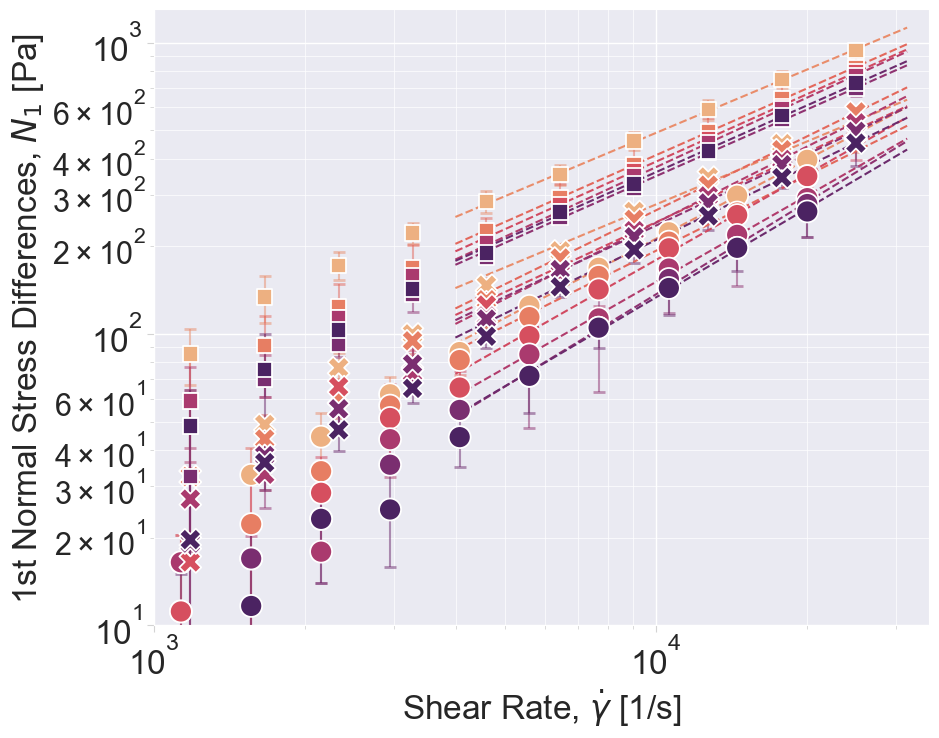

In [22]:
fontsize = 24
x_axis = 'Shear rate'
y_axis = 'N1'
colors = sns.color_palette('flare',6)
temperatures = df_05_mean['Temperature [°C]'].unique()
df_fit_params_n1 = pd.DataFrame()


with sns.axes_style('darkgrid'):
    fig= plt.figure(0, (10,8))
    ax = plt.gca()

    vis = sns.scatterplot(x=x_axis, y=y_axis, data=df_means,
                          hue='Temperature [°C]', legend=None,
                          style ='Sample',
                          palette='flare', zorder=3,
                          s=250
                          )
    vis.set(xscale='log', yscale='log')

    # Fitting temperature curves
    for jj, tt in enumerate(temperatures):
        df_t_05 = df_05_mean[df_05_mean['Temperature [°C]'] == tt]
        df_t_06 = df_06_mean[df_06_mean['Temperature [°C]'] == tt]
        df_t_084 = df_084_mean[df_084_mean['Temperature [°C]'] == tt]

        df_05_std = std_05[std_05['Temperature [°C]'] == tt]
        df_06_std = std_06[std_06['Temperature [°C]'] == tt]
        df_084_std = std_084[std_084['Temperature [°C]'] == tt]

        df_t_05_all = df_05_mean_all[df_05_mean_all['Temperature [°C]'] == tt]
        df_t_06_all = df_06_mean_all[df_06_mean_all['Temperature [°C]'] == tt]
        df_t_084_all = df_084_mean_all[df_084_mean_all['Temperature [°C]'] == tt]

        xdata_05 = np.array(df_t_05['Shear rate'], dtype=float)
        ydata_05 = np.array(df_t_05['N1'], dtype=float)

        xdata_06 = np.array(df_t_06['Shear rate'], dtype=float)
        ydata_06 = np.array(df_t_06['N1'], dtype=float)

        xdata_084 = np.array(df_t_084['Shear rate'], dtype=float)
        ydata_084 = np.array(df_t_084['N1'], dtype=float)

        xdata_05_all = np.array(df_t_05_all['Shear rate'], dtype=float)
        ydata_05_all = np.array(df_t_05_all['N1'], dtype=float)

        xdata_06_all = np.array(df_t_06_all['Shear rate'], dtype=float)
        ydata_06_all = np.array(df_t_06_all['N1'], dtype=float)

        xdata_084_all = np.array(df_t_084_all['Shear rate'], dtype=float)
        ydata_084_all = np.array(df_t_084_all['N1'], dtype=float)

        N1_std_05 = np.array(df_05_std['N1'], dtype=float)
        N1_std_06 = np.array(df_06_std['N1'], dtype=float)
        N1_std_084 = np.array(df_084_std['N1'], dtype=float)

        log_xdata_05 = np.log(xdata_05)
        log_ydata_05 = np.log(ydata_05)

        log_xdata_06 = np.log(xdata_06)
        log_ydata_06 = np.log(ydata_06)

        log_xdata_084 = np.log(xdata_084)
        log_ydata_084 = np.log(ydata_084)

        fit, cov = np.polyfit(log_xdata_05, log_ydata_05, 1, cov=True)
        fit_06, cov_06 = np.polyfit(log_xdata_06, log_ydata_06, 1, cov=True)
        fit_084, cov_084 = np.polyfit(log_xdata_084, log_ydata_084, 1, cov=True)

        #power law liquid values
        xdata_fit = np.logspace(3.6, 4.5)
        n = fit[0]
        K = np.exp(fit[1])
        ydata_fit_05 = K * xdata_fit**n
        n_05_err = np.sqrt(np.diag(cov)[0])
        K_05_err = np.sqrt(np.diag(cov)[1])

        n_06 = fit_06[0]
        K_06 = np.exp(fit_06[1])
        ydata_fit_06 = K_06 * xdata_fit**n_06
        n_06_err = np.sqrt(np.diag(cov_06)[0])
        K_06_err = np.sqrt(np.diag(cov_06)[1])

        n_084 = fit_084[0]
        K_084 = np.exp(fit_084[1])
        ydata_fit_084 = K_084 * xdata_fit**n_084
        n_084_err = np.sqrt(np.diag(cov_084)[0])
        K_084_err = np.sqrt(np.diag(cov_084)[1])

        ax.plot(xdata_fit, ydata_fit_05, ls='--', c=colors[jj], zorder=2)
        ax.plot(xdata_fit, ydata_fit_06, ls='--', c=colors[jj], zorder=2)
        ax.plot(xdata_fit, ydata_fit_084, ls='--', c=colors[jj], zorder=2)
        ax.errorbar(xdata_05_all, ydata_05_all, yerr=N1_std_05,
                    xerr=None, ls='None', capsize=4, capthick=2, c=colors[jj], alpha=0.5, zorder=1)
        ax.errorbar(xdata_06_all, ydata_06_all, yerr=N1_std_06,
                    xerr=None, ls='None', capsize=4, capthick=2, c=colors[jj], alpha=0.5, zorder=1)
        ax.errorbar(xdata_084_all, ydata_084_all, yerr=N1_std_084,
                    xerr=None, ls='None', capsize=4, capthick=2, c=colors[jj], alpha=0.5, zorder=1)

        fit_params_n1 = {'n_05': [n],
                         'K_05': [K],
                         'n_05_err': [n_05_err],
                         'K_05_err': [K_05_err * K],
                         'n_06': [n_06],
                         'K_06': [K_06],
                         'n_06_err': [n_06_err],
                         'K_06_err': [K_06_err * K_06],
                         'n_084': [n_084],
                         'K_084': [K_084],
                         'n_084_err': [n_084_err],
                         'K_084_err': [K_084_err * K_084],
                         'temperature': [tt],
                         }
        df_fit_params_n1 = pd.concat([df_fit_params_n1, pd.DataFrame(fit_params_n1)])

    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(3,0))
    ax.yaxis.set_minor_formatter(y_minor_formatter)

    ax.set_xlim(1000, 35000)
    ax.set_ylim(10,1300)
    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)
    plt.xlabel("Shear Rate, $\dot\gamma$ [1/s]", fontsize=fontsize)
    plt.ylabel("1st Normal Stress Differences, $N_1 $ [Pa]", fontsize=fontsize)

    #savename = r"..\plots\fig_4\Figure_4C"
    #fig.savefig(savename+".png", dpi=900, bbox_inches='tight')
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches='tight')

    plt.show()

In [23]:
df_fit_params_n1

n_05      K_05  n_05_err  K_05_err      n_06      K_06  n_06_err  \
0  0.903453  0.051716  0.006719  0.003224  0.718275  0.373191  0.065701   
0  0.857288  0.071934  0.026569  0.017730  0.843072  0.112894  0.009410   
0  0.978286  0.021951  0.032792  0.006678  0.796671  0.157532  0.026095   
0  0.982671  0.017727  0.034357  0.005650  0.868909  0.080638  0.017730   
0  1.050833  0.008576  0.042919  0.003414  0.812254  0.132895  0.012443   
0  1.013768  0.011780  0.029930  0.003271  0.838194  0.093395  0.008472   

   K_06_err     n_084     K_084  n_084_err  K_084_err  temperature  
0  0.231966  0.721985  0.634803   0.012650   0.075971           22  
0  0.010051  0.761474  0.369993   0.004044   0.014155           25  
0  0.038891  0.770009  0.324936   0.007264   0.022331           28  
0  0.013526  0.792751  0.252339   0.007259   0.017330           31  
0  0.015644  0.760786  0.315350   0.013238   0.039495           34  
0  0.007485  0.761548  0.323290   0.016601   0.050775           37

##  Fig. 4D N1 - shear stress relationship

In [24]:
df_means_filtered = df_means[df_means['Shear rate'] > 5000]

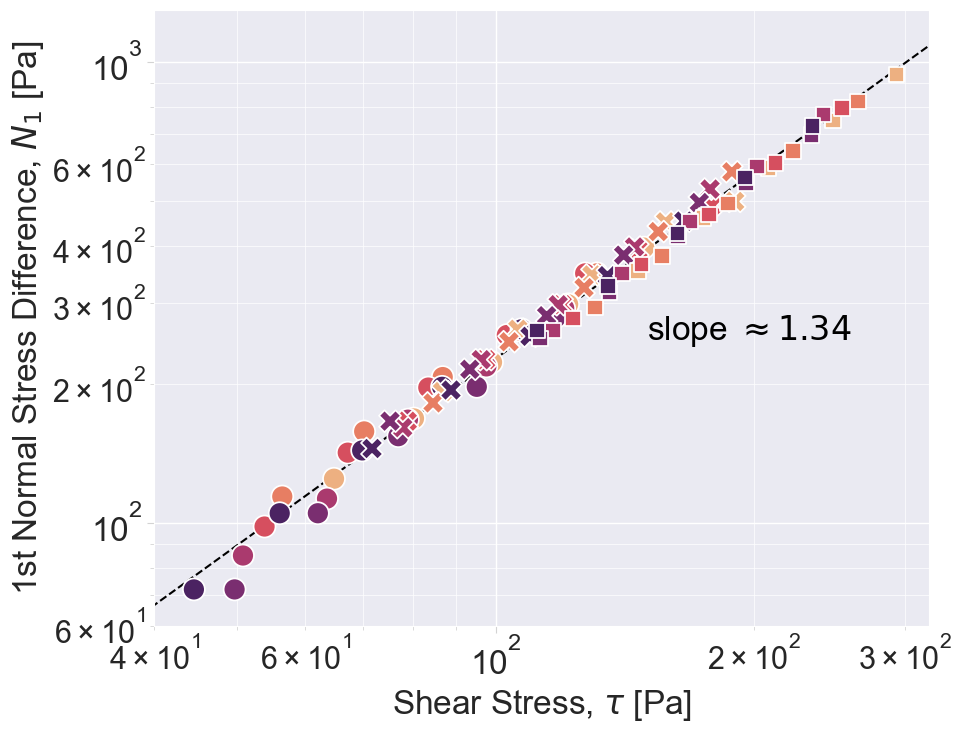

In [25]:
fontsize = 24
x_axis = 'Shear stress'
y_axis = 'N1'
colors = sns.color_palette('flare',6)
temperatures = df_05_mean['Temperature [°C]'].unique()
df_fit_params_n1 = pd.DataFrame()


with sns.axes_style('darkgrid'):
    fig= plt.figure(0, (10,8))
    ax = plt.gca()

    vis = sns.scatterplot(x=x_axis, y=y_axis, data=df_means_filtered,
                          hue='Temperature [°C]',
                          style ='Sample',
                          palette='flare',
                          s=250, zorder=2
                          )
    vis.set(xscale='log', yscale='log')

    # Fitting
    xdata = np.array(df_means_filtered['Shear stress'], dtype=float)
    ydata = np.array(df_means_filtered['N1'], dtype=float)

    log_xdata = np.log(xdata)
    log_ydata = np.log(ydata)

    fit, cov = np.polyfit(log_xdata, log_ydata, 1, cov=True)

    n = fit[0]
    K = np.exp(fit[1])

    n_err = np.sqrt(np.diag(cov)[0])
    K_err = K * np.sqrt(np.diag(cov)[1])

    xdata_fit = np.logspace(1, 3, 100)
    ydata_fit = K * xdata_fit**n
    ax.plot(xdata_fit, ydata_fit, ls='--', c='k', zorder=1)

    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=(3,0))
    ax.yaxis.set_minor_formatter(y_minor_formatter)

    ax.set_xlim(40, 320)
    ax.set_ylim(60,1300)
    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)
    plt.xlabel(r"Shear Stress, $\tau$ [Pa]", fontsize=fontsize)
    plt.ylabel("1st Normal Stress Difference, $N_1 $ [Pa]", fontsize=fontsize)

    handles, labels = ax.get_legend_handles_labels()

    ax.legend_ = None

    ax.text(150, 250,  r"slope $\approx {:.2f}$".format(n), fontsize=fontsize, color='k')

    #savename = r"..\plots\figure_4\Figure_4D"
    #fig.savefig(savename+".png", dpi=900, bbox_inches='tight')
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches='tight')

    plt.show()

In [26]:
# Determine the slope and intercept

print("n = {:.4f} +\- {:.4f}".format(n, n_err))
print("K = {:.4f} +\- {:.4f}".format(K, K_err))

n = 1.3437 +\- 0.0140
K = 0.4677 +\- 0.0315
